<a href="https://colab.research.google.com/github/micahjoseph/Ensemble-Learning-Techniques/blob/main/Ensembles_of_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The literary meaning of word **‘ensemble’** is group. Ensemble methods involve group of predictive models to achieve a better accuracy and model stability. 

Ensemble methods are known to impart supreme boost to tree based models.

Like every other model, a tree based algorithm also suffers from the plague of **bias** and **variance**.

Decision trees are prone to overfitting.

Normally, as you increase the complexity of your model, in this case decision tree, you will see a reduction in training error due to lower bias in the model. As you continue to make your model more complex, you end up over-fitting your model and your model will start suffering from high variance.

A champion model should maintain a balance between these two types of errors. This is known as the trade-off management of bias-variance errors. 

**Ensemble learning is one way to tackle bias-variance trade-off.**

There are various ways to ensemble *weak* learners to come up with *strong* learners:

1. Bagging
2. Boosting
3. Stacking

# 1. Bagging

Bagging is an ensemble technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set. The following figure will make it clearer:

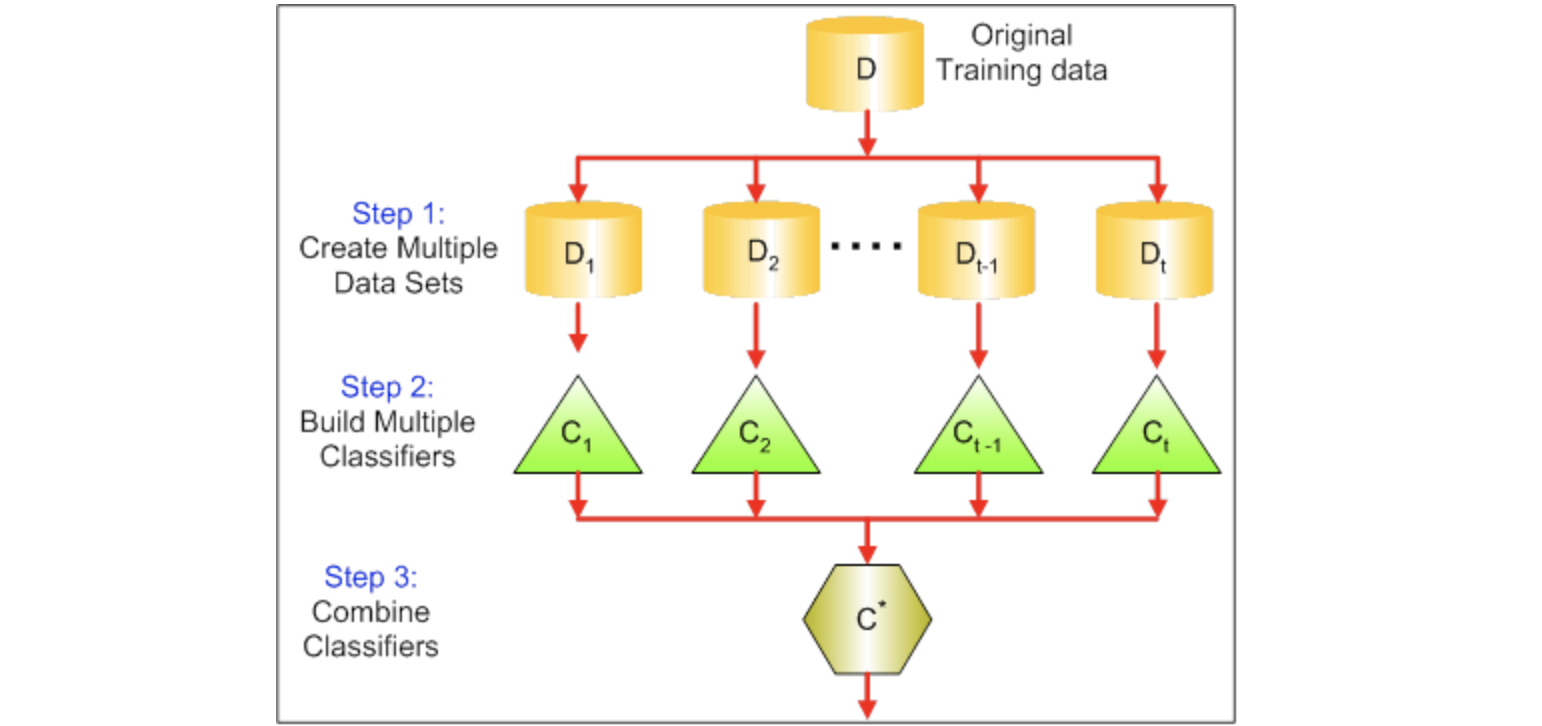

The steps followed in bagging are:

1. **Create Multiple DataSets:** Sampling is done with replacement on the original data and new datasets are formed.

2. **Build Multiple Classifiers:** Classifiers are built on each data set. Generally the same classifier is modeled on each data set and predictions are made.

3. **Combine Classifiers:** The predictions of all the classifiers are combined using a mean, median or mode value depending on the problem at hand.
The combined values are generally more robust than a single model.

Note that, here the number of models built is not a hyper-parameters. Higher number of models are always better or may give similar performance than lower numbers. 

**Important: It can be theoretically shown that the variance of the combined predictions are reduced to 1/n (n: number of classifiers) of the original variance, under some assumptions. (Think Central Limit Theorem)**

There are various implementations of bagging models. Random forest is one of them and we’ll discuss it next.

## **Random Forest**

*   In Random Forest, we grow multiple trees as opposed to a single tree in CART model.
*   We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
*   To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
*   The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

#### **How does it work?**

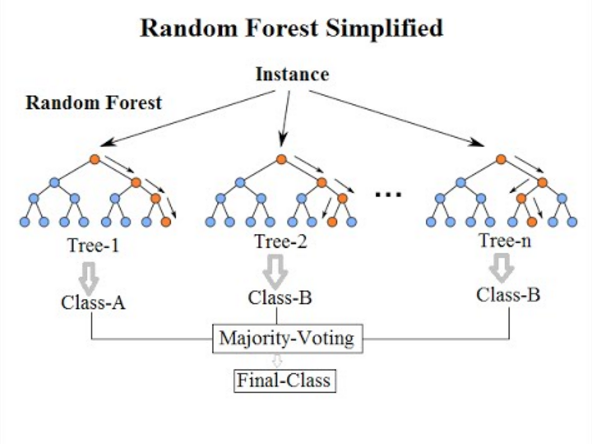

It works in the following manner:

*   Assume number of rows in the training set is N. Then, a sample of n < N rows is taken at random but *with replacement.* This sample will be the training set for growing the tree.
*   If there are M input variables, a number m < M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
*   Each tree is grown to the largest extent possible and  there is no pruning.
*   Predict new data by aggregating the predictions of the n tree trees (i.e., majority votes for classification, average for regression).

#### **Advantages**

*   This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
*   RF has the power of handling large datasets with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).
*   It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data is missing.
*   It has methods for balancing errors in data sets where classes are imbalanced.
*   The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
*   Random Forest involves sampling of the input data with replacement called as bootstrap sampling. Here one third (say) of the data is not used for training and can be used to testing. These are called the out of bag samples. Error estimated on these out of bag samples is known as out of bag error. Out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

#### **Disadvantages**

*   It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.
*   Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds!

# 2. Boosting

Boosting fit a sequence of weak learners − models that are only slightly better than random guessing, such as small decision trees − to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.


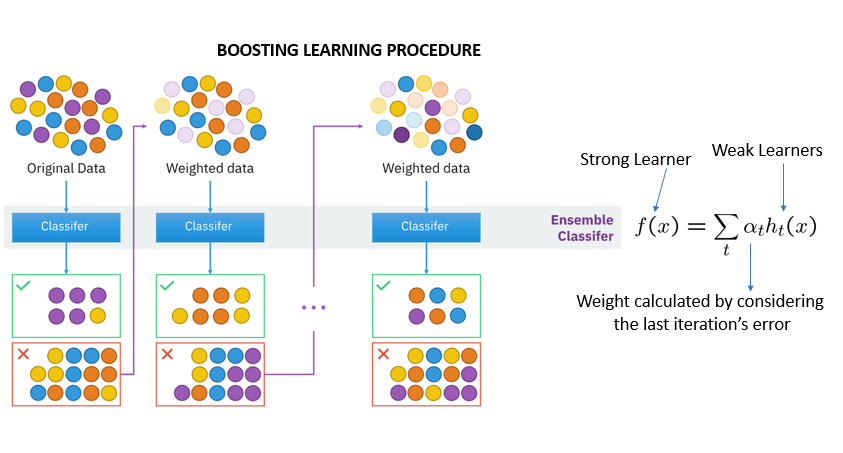

There are many boosting algorithms which impart additional boost to model’s accuracy:

1. Gradient Boosting Machine
2. XGBoost
3. AdaBoost
4. LightGBM
5. CatBoost

### **Gradient Boosting Machine**

Gradient Boosting Machine (GBM) builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

#### **How does it work?**

*   Let's take a dataset {$ (x_{1}, y_{1}) , (x_{2}, y_{2}) , (x_{3}, y_{3}), ...., (x_{n}, y_{n})$}
*   Choose a loss function, let's say MSE.
*   Fit a naive model on the dataset, a simple tree or just take $ \bar{y} $, call this model $ F_{0}(x) $

First interation

*   Get residuals of all predictions,  $ r_{i1}(x) = y_{i}- F_{0}(x_{i})$
*   Fit a model (can be regression tree) on residuals {$ (x_{1}, r_{11}) , (x_{2}, r_{21}) , (x_{3}, r_{31}), ...., (x_{n1}, r_{n1})$}, call this model $ h_{1}(x) $
*   New predictor is $ F_{1}(x) = F_{0}(x) + \gamma_{1} h_{1}(x) $. Find $\gamma_{1}$ which minimizes MSE.

Second iteration

*   Get residuals of all predictions,  $ r_{i2}(x) = y_{i}- F_{1}(x)$
*   Fit a model (can be regression tree) on residuals {$ (x_{1}, r_{12}) , (x_{2}, r_{22}) , (x_{3}, r_{32}), ...., (x_{n2}, r_{n2})$}, call this model $ h_{2}(x) $
*   New predictor is $ F_{2}(x) = F_{1}(x) + \gamma_{2} h_{2}(x) $. Find $\gamma_{2}$ which minimizes MSE.

and so on...

*   Get residuals of all predictions,  $ r_{im}(x) = y_{i}- F_{m-1}(x)$
*   Fit a model (can be regression tree) on residuals {$ (x_{1}, r_{1m}) , (x_{2}, r_{2m}) , (x_{3}, r_{3m}), ...., (x_{nm}, r_{nm})$}, call this model $ h_{m}(x) $
*   **Final predictor** is $ F_{m}(x) = F_{m-1}(x) + \gamma_{m} h_{m}(x) $. Find $\gamma_{m}$ which minimizes MSE.